In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = "WorldEnergyConsumption.csv"
df = pd.read_csv(path)
# pd.set_option('display.max_rows', None) # This line is for printing the whole df
df.head()


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [2]:
df.shape

(22012, 129)

In [3]:
# Creating and renaming the DF
df_new = df[['country','year','iso_code','population','gdp','biofuel_consumption','coal_consumption','gas_consumption',
          'hydro_consumption', 'nuclear_consumption','oil_consumption','solar_consumption','wind_consumption']]
df_new.rename(columns ={
           "biofuel_consumption" : "biofuel_cons_TWh",
           "coal_consumption" : "coal_cons_TWh",
           "gas_consumption" : "gas_cons_TWh",
           "hydro_consumption" : "hydro_cons_TWh",
           "nuclear_consumption" : "nuclear_cons_TWh",
           "oil_consumption" : "oil_cons_TWh",
           "solar_consumption" : "solar_cons_TWh",
           "wind_consumption" : "wind_cons_TWh"}, inplace=True)
df_new.head()

C:\Users\husey\AppData\Local\Temp\ipykernel_25780\3294176711.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns ={


,country,year,iso_code,population,gdp,biofuel_cons_TWh,coal_cons_TWh,gas_cons_TWh,hydro_cons_TWh,nuclear_cons_TWh,oil_cons_TWh,solar_cons_TWh,wind_cons_TWh
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Filtering the Year
df_timerange = df_new[df["year"] >= 2010 ]
df_timerange.head()

,country,year,iso_code,population,gdp,biofuel_cons_TWh,coal_cons_TWh,gas_cons_TWh,hydro_cons_TWh,nuclear_cons_TWh,oil_cons_TWh,solar_cons_TWh,wind_cons_TWh
10,ASEAN (Ember),2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,ASEAN (Ember),2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,ASEAN (Ember),2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,ASEAN (Ember),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,ASEAN (Ember),2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping NaN values in the iso_code
df_cleaned = df_timerange[df_timerange["iso_code"].notna()]
df_cleaned.head()

,country,year,iso_code,population,gdp,biofuel_cons_TWh,coal_cons_TWh,gas_cons_TWh,hydro_cons_TWh,nuclear_cons_TWh,oil_cons_TWh,solar_cons_TWh,wind_cons_TWh
133,Afghanistan,2010,AFG,28189672.0,4.739942e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,Afghanistan,2011,AFG,29249156.0,5.332634e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Afghanistan,2012,AFG,30466484.0,5.916690e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,Afghanistan,2013,AFG,31541216.0,6.299370e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,Afghanistan,2014,AFG,32716214.0,6.434611e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_rows', None)

df_specific = df_cleaned[df_cleaned["country"]== "Hong Kong"]
df_specific.head()

,country,year,iso_code,population,gdp,biofuel_cons_TWh,coal_cons_TWh,gas_cons_TWh,hydro_cons_TWh,nuclear_cons_TWh,oil_cons_TWh,solar_cons_TWh,wind_cons_TWh
8846,Hong Kong,2010,HKG,7132437.0,2.989185e+11,0.043,72.423,35.943,0.0,0.0,212.637,0.003,0.003
8847,Hong Kong,2011,HKG,7175370.0,3.108814e+11,0.306,86.147,28.625,0.0,0.0,214.105,0.008,0.002
8848,Hong Kong,2012,HKG,7234062.0,3.161678e+11,0.053,84.797,26.359,0.0,0.0,205.138,0.008,0.003
8849,Hong Kong,2013,HKG,7296820.0,3.259746e+11,0.154,90.376,24.833,0.0,0.0,209.566,0.008,0.002
8850,Hong Kong,2014,HKG,7352180.0,3.349804e+11,0.082,94.726,23.870,0.0,0.0,198.409,0.008,0.002


In [7]:
columns_name = (['biofuel_cons_TWh','coal_cons_TWh','gas_cons_TWh','hydro_cons_TWh','low_carbon_cons_TWh','nuclear_cons_TWh',
                 'oil_cons_TWh','solar_cons_TWh','wind_cons_TWh' ])

In [8]:
North_America = ['American Samoa','Antigua and Barbuda','Bahamas','Barbados','Belize','Bermuda','British Virgin Islands',
                 'Canada','Cayman Islands','Costa Rica','Cuba','Dominica','Dominican Republic','El Salvador','Greenland',
                 'Grenada','Guadeloupe','Guatemala','Haiti','Honduras','Jamaica','Martinique','Mexico','Montserrat','Nicaragua',
                 'Panama','Puerto Rico','Saint Kitts and Nevis', 'Saint Lucia','Saint Pierre and Miquelon', 
                 'Saint Vincent and the Grenadines','Samoa','United States Virgin Islands','United States Territories',
                 'United States','Turks and Caicos Islands']

In [9]:
df_NA = pd.DataFrame
df_NA = df_cleaned[df_cleaned['country'].isin(North_America)]
# df_NA.head()

In [10]:
South_America = ['Argentina','Aruba','Bolivia','Brazil','Chile','Colombia','Ecuador','Falkland Islands','French Guiana', 
                 'French Polynesia','Guyana','Paraguay', 'Peru','Venezuela','Uruguay','Trinidad and Tobago']

In [11]:
df_SA = pd.DataFrame
df_SA = df_cleaned[df_cleaned['country'].isin(South_America)]
# df_SA.head()

In [12]:
Europe = ['Albania','Austria','Belgium','Belarus','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czechia','Denmark',
          'Estonia', 'Faroe Islands','Finland', 'France','Georgia', 'Germany','Gibraltar','Greece','Hungary', 'Iceland',
          'Ireland','Italy','Latvia','Lithuania', 'Luxembourg','Macao','Malta','Moldova','Montenegro','Netherlands', 
          'Netherlands Antilles','North Macedonia','Norway','Poland', 'Portugal','Romania','Serbia','Yugoslavia',
          'United Kingdom','Ukraine','Turkey','Switzerland','Sweden','Spain','Slovenia','Slovakia',]

In [13]:
df_EU = pd.DataFrame
df_EU = df_cleaned[df_cleaned['country'].isin(Europe)]
# df_EU.head()

In [14]:
Africa = ['Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cameroon','Cape Verde','Central African Republic', 
          'Chad','Comoros', 'Congo',"Cote d'Ivoire",'Democratic Republic of Congo','Djibouti','Egypt','Equatorial Guinea', 
          'Eritrea','Eswatini', 'Ethiopia','Ghana','Guinea','Guinea-Bissau','Kenya','Lesotho','Liberia', 'Libya','Madagascar', 
          'Malawi','Mali','Mauritania','Mauritius','Morocco','Mozambique','Namibia','Niger', 'Nigeria','Rwanda','Saint Helena',
          'Sao Tome and Principe','Senegal','Seychelles','Zimbabwe','Zambia','Yemen','Western Sahara','Tunisia',
          'Trinidad and Tobago','Togo','Sudan','Suriname','South Sudan','South Africa','Somalia','Sierra Leone']

In [15]:
df_AF = pd.DataFrame
df_AF = df_cleaned[df_cleaned['country'].isin(Africa)]
# df_AF.head()

In [16]:
Oceania= ['Australia','Fiji','Cook Islands','Kiribati','Micronesia (country)','Nauru','New Caledonia','New Zealand','Niue',
          'Northern Mariana Islands','Papua New Guinea','Wake Island','Vanuatu','United States Pacific Islands','Tuvalu',
          'Tonga','Solomon Islands']

In [17]:
df_OC = pd.DataFrame
df_OC = df_cleaned[df_cleaned['country'].isin(Oceania)]
# df_OC.head()

In [18]:
Asia = ['Afghanistan','Armenia','Azerbaijan','Bahrain', 'Bangladesh','Bhutan','Brunei','Cambodia','China','East Timor',
        'Hong Kong','India','Indonesia', 'Iran', 'Iraq','Israel','Japan', 'Jordan', 'Kazakhstan','Kuwait', 'Kyrgyzstan', 'Laos',
        'Lebanon','Malaysia','Maldives','Mongolia','Myanmar','Nepal','North Korea','Oman', 'Pakistan','Palestine','Philippines',
        'Qatar','Russia','Saudi Arabia','Vietnam','Uzbekistan','United Arab Emirates','USSR','Turkmenistan','Thailand','Taiwan',
        'Syria','Sri Lanka','South Korea','Singapore']

In [19]:
df_AS = pd.DataFrame
df_AS = df_cleaned[df_cleaned['country'].isin(Asia)]
# df_AS.head()

In [20]:
countries = df_cleaned['country'].unique()

In [21]:
World = ["North_America","South_America","Europe","Africa","Oceania","Asia"]
World

['North_America', 'South_America', 'Europe', 'Africa', 'Oceania', 'Asia']

In [22]:
continent_dict_oceania = {country: 'Oceania' for country in Oceania}
continent_dict_asia = {country: 'Asia' for country in Asia}
continent_dict_europe = {country: 'Europe' for country in Europe}
continent_dict_africa = {country: 'Africa' for country in Africa}
continent_dict_south_a = {country: 'South_America' for country in South_America}
continent_dict_north_a = {country: 'North_America' for country in North_America}

# Combine the dictionaries
continent_dict = {**continent_dict_oceania, **continent_dict_asia, **continent_dict_europe, **continent_dict_africa, 
                  **continent_dict_south_a, **continent_dict_north_a}

# Use the map function to create the continent column
df_cleaned['Continent'] = df_cleaned['country'].map(continent_dict)

# Fill NaN values with 'Unknown' for countries not in the lists
df_cleaned['Continent'].fillna('Unknown', inplace=True)

C:\Users\husey\AppData\Local\Temp\ipykernel_25780\3618373874.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Continent'] = df_cleaned['country'].map(continent_dict)
C:\Users\husey\AppData\Local\Temp\ipykernel_25780\3618373874.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original obje

In [23]:
df_cleaned.head()

,country,year,iso_code,population,gdp,biofuel_cons_TWh,coal_cons_TWh,gas_cons_TWh,hydro_cons_TWh,nuclear_cons_TWh,oil_cons_TWh,solar_cons_TWh,wind_cons_TWh,Continent
133,Afghanistan,2010,AFG,28189672.0,4.739942e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
134,Afghanistan,2011,AFG,29249156.0,5.332634e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
135,Afghanistan,2012,AFG,30466484.0,5.916690e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
136,Afghanistan,2013,AFG,31541216.0,6.299370e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
137,Afghanistan,2014,AFG,32716214.0,6.434611e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [24]:
df_cleaned.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'biofuel_cons_TWh',
       'coal_cons_TWh', 'gas_cons_TWh', 'hydro_cons_TWh', 'nuclear_cons_TWh',
       'oil_cons_TWh', 'solar_cons_TWh', 'wind_cons_TWh', 'Continent'],
      dtype='object')

In [25]:
new_orderdf = ['country', 'Continent', 'year', 'iso_code', 'population', 'gdp', 'biofuel_cons_TWh','coal_cons_TWh', 
               'gas_cons_TWh', 'hydro_cons_TWh', 'nuclear_cons_TWh', 'oil_cons_TWh','solar_cons_TWh', 
               'wind_cons_TWh']

In [26]:
df_clean = pd.DataFrame(df_cleaned[new_orderdf])
df_clean.head()

,country,Continent,year,iso_code,population,gdp,biofuel_cons_TWh,coal_cons_TWh,gas_cons_TWh,hydro_cons_TWh,nuclear_cons_TWh,oil_cons_TWh,solar_cons_TWh,wind_cons_TWh
133,Afghanistan,Asia,2010,AFG,28189672.0,4.739942e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,Afghanistan,Asia,2011,AFG,29249156.0,5.332634e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,Afghanistan,Asia,2012,AFG,30466484.0,5.916690e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,Afghanistan,Asia,2013,AFG,31541216.0,6.299370e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,Afghanistan,Asia,2014,AFG,32716214.0,6.434611e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_clean.shape

(2734, 14)

In [28]:
df_for_loop= pd.DataFrame(columns=["Country","Population","Energy Source","Total","First Value", "Last Value",
                                   "Mean", "Max Value","Min Value"])

In [29]:
i = 0
for a in countries:
    new_df_name = df_clean[df_clean["country"]== a]
    print(a)
    for x in columns_name:
        try :
            first_index = new_df_name[x].first_valid_index()
            first_value = new_df_name[x][first_index]
            first_year = new_df_name["year"][first_index]
            last_index = new_df_name[x].last_valid_index()
            last_value = new_df_name[x][last_index]
            last_year = new_df_name["year"][last_index]      
            total_value = new_df_name[x].sum()  
            average = new_df_name[x].mean()
            highest_value = new_df_name[x].max()
            lowest_value = new_df_name[x].min()
            population_value = new_df_name["population"].mean()
            df_for_loop.loc[i, :] = [a,population_value, x, total_value, first_value, last_value, average, highest_value, 
                                     lowest_value]
            i += 1
        except Exception as e :
            print(f"Not enough data to process")


Afghanistan
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Albania
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Algeria
Not enough data to process
Not enough data to process
Not enough data to process
American Samoa
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Angola
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not e

Trinidad and Tobago
Not enough data to process
Not enough data to process
Tunisia
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Turkey
Not enough data to process
Not enough data to process
Turkmenistan
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Turks and Caicos Islands
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Tuvalu
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
Not enough data to process
No

In [30]:
df_for_loop.head()

,Country,Population,Energy Source,Total,First Value,Last Value,Mean,Max Value,Min Value
0,Algeria,40354271.076923,coal_cons_TWh,35.097,3.605,1.497,2.699769,5.815,0.57
1,Algeria,40354271.076923,gas_cons_TWh,4899.826,253.272,442.75,376.909692,477.015,253.272
2,Algeria,40354271.076923,hydro_cons_TWh,5.18,0.48,0.2,0.398462,1.067,0.024
3,Algeria,40354271.076923,oil_cons_TWh,2841.399,181.612,238.618,218.569154,238.618,181.612
4,Algeria,40354271.076923,solar_cons_TWh,11.071,0.025,1.777,0.851615,1.799,0.025


In [31]:
df_for_loop["Total"] = pd.to_numeric(df_for_loop["Total"])
df_for_loop["Population"] = pd.to_numeric(df_for_loop["Population"])
df_for_loop["First Value"] = pd.to_numeric(df_for_loop["First Value"])
df_for_loop["Last Value"] = pd.to_numeric(df_for_loop["Last Value"])
df_for_loop["Max Value"] = pd.to_numeric(df_for_loop["Max Value"])
df_for_loop["Min Value"] = pd.to_numeric(df_for_loop["Min Value"])
df_for_loop["Mean"] = pd.to_numeric(df_for_loop["Mean"])

df_for_loop.dtypes

Country           object
Population       float64
Energy Source     object
Total            float64
First Value      float64
Last Value       float64
Mean             float64
Max Value        float64
Min Value        float64
dtype: object

In [32]:
df_population = pd.DataFrame(columns=["Country","Population"])
df_population

,Country,Population


In [33]:
i = 0
for a in countries:
    new_df_name = df_for_loop[df_for_loop["Country"]== a]
    data_population = new_df_name["Population"].mean()
    
    df_population.loc[i, :] = [a,data_population]
    i += 1

In [34]:
df_population = df_population.dropna()
df_population.head()

,Country,Population
2,Algeria,40354271.076923
7,Argentina,43519055.692308
10,Australia,24184466.923077
11,Austria,8682740.692308
12,Azerbaijan,9899290.0


In [35]:
population_SA = round(df_population[df_population["Country"].isin(South_America)]["Population"].sum())
population_SA

395279529

In [36]:
population_NA = round(df_population[df_population["Country"].isin(North_America)]["Population"].sum())
population_NA

483509371

In [37]:
population_EU =  round(df_population[df_population["Country"].isin(Europe)]["Population"].sum())
population_EU

658405304

In [38]:
population_AF =  round(df_population[df_population["Country"].isin(Africa)]["Population"].sum())
population_AF

232367506

In [39]:
population_OC =  round(df_population[df_population["Country"].isin(Oceania)]["Population"].sum())
population_OC

28898420

In [40]:
population_AS =  round(df_population[df_population["Country"].isin(Asia)]["Population"].sum())
population_AS

4294142392

In [41]:
pop_cont_df = pd.DataFrame(columns=["Continent","Population"])
pop_cont_df

,Continent,Population


In [42]:
pop_cont_df["Continent"] = World
pop_cont_df["Population"] = [population_NA, population_SA, population_EU, population_AF, population_OC, population_AS]
pop_cont_df

,Continent,Population
0,North_America,483509371
1,South_America,395279529
2,Europe,658405304
3,Africa,232367506
4,Oceania,28898420
5,Asia,4294142392


In [43]:
df_World = pd.DataFrame(columns=["Year","Continent","Bio Total","Coal Total","Gas Total", "Hydro Total", 
                                 "Nuclear Total","Oil Total","Solar Total","Wind Total"])
df_World

,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total


In [44]:
Years = df_clean['year'].unique()
Years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [45]:
# Initialize a dictionary to hold total consumption per continent for each year
total_consumption = {}
j = 0
# Loop through each year
for yr in Years:
    # Initialize the dictionary for the current year
    total_consumption[yr] = {}
    

    # Loop through each continent
    for continent in World:
        # Filter the DataFrame for the specific year and continent
        continent_data = df_clean[(df_clean['year'] == yr) & (df_clean['Continent'] == continent)]
        
        # Calculate total energy consumption for that continent
        bio_total = continent_data["biofuel_cons_TWh"].sum()
        coal_total = continent_data["coal_cons_TWh"].sum()
        gas_total = continent_data["gas_cons_TWh"].sum()
        hydro_total = continent_data["hydro_cons_TWh"].sum()
        nuclear_total = continent_data["nuclear_cons_TWh"].sum()
        oil_total = continent_data["oil_cons_TWh"].sum()
        solar_total = continent_data["solar_cons_TWh"].sum()
        wind_total = continent_data["wind_cons_TWh"].sum()
        
        
        df_World.loc[j, :] = [yr, continent, bio_total, coal_total, gas_total, hydro_total, nuclear_total, 
                              oil_total, solar_total, wind_total]        
        j +=1  

In [46]:
df_World.head()

,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
0,2010,North_America,308.292,6235.646,8058.101,1792.517,2517.871,12329.032,9.158,293.022
1,2010,South_America,182.997,301.698,1421.987,1677.323,57.884,2645.514,0.019,7.134
2,2010,Europe,149.66,4102.751,6405.355,1693.881,2748.15,8665.475,65.202,425.814
3,2010,Africa,0.159,1120.952,736.056,49.233,36.028,1042.161,0.172,5.834
4,2010,Oceania,2.626,623.466,360.824,106.783,0.0,603.364,2.725,18.38


In [47]:
df_World_total = pd.DataFrame(columns=["Year","Bio Total","Coal Total","Gas Total", "Hydro Total", 
                                 "Nuclear Total","Oil Total","Solar Total","Wind Total"])
df_World_total

,Year,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total


In [48]:
i = 0
for a in Years:
    new_df_name = df_World[df_World["Year"]== a]
    b_w = new_df_name["Bio Total"].sum()
    c_w = new_df_name["Coal Total"].sum()
    g_w = new_df_name["Gas Total"].sum()
    h_w = new_df_name["Hydro Total"].sum()
    n_w = new_df_name["Nuclear Total"].sum()
    o_t = new_df_name["Oil Total"].sum()
    s_t = new_df_name["Solar Total"].sum()
    w_t = new_df_name["Wind Total"].sum()
    
    
    df_World_total.loc[i, :] = [a, b_w, c_w, g_w, h_w, n_w, o_t, s_t, w_t]
    i += 1

In [49]:
df_World_total.head()

,Year,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
0,2010,695.425,41506.09,30890.068,8701.021,7366.458,45554.826,93.426,958.287
1,2011,730.621,43460.614,31640.484,8821.792,7014.738,45940.506,179.845,1211.661
2,2012,757.809,43599.342,32465.852,9155.163,6494.288,46678.781,276.25,1448.321
3,2013,823.578,44258.366,32983.149,9435.552,6506.634,47138.999,375.068,1722.907
4,2014,873.275,44421.666,33174.016,9668.397,6599.599,47462.789,530.795,1898.426


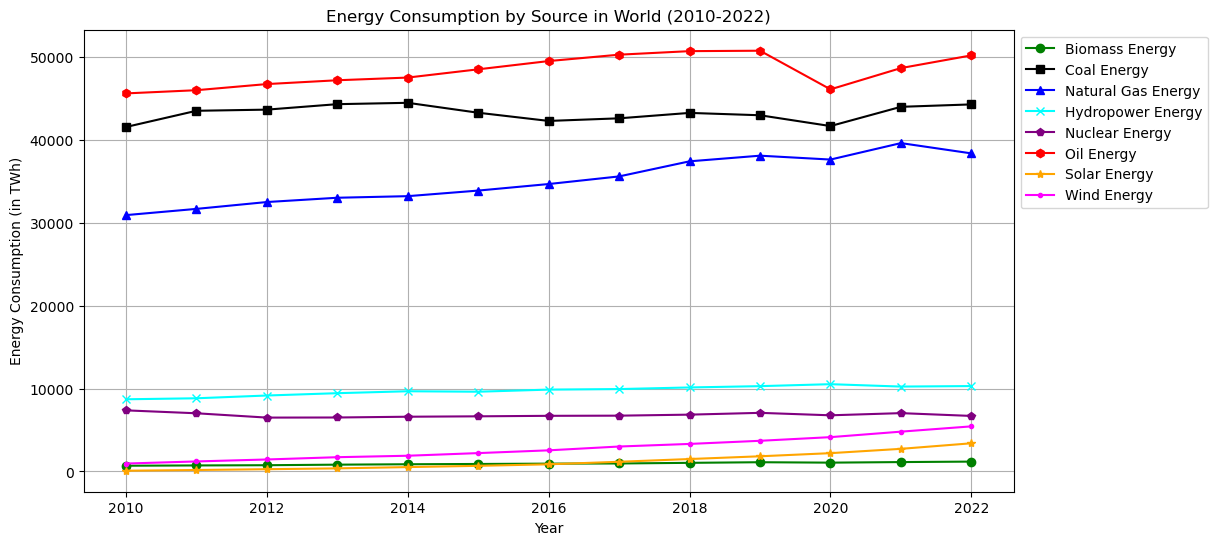

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(df_World_total['Year'], df_World_total['Bio Total'], label='Biomass Energy', color='green', marker='o')
plt.plot(df_World_total['Year'], df_World_total['Coal Total'], label='Coal Energy', color='black', marker='s')
plt.plot(df_World_total['Year'], df_World_total['Gas Total'], label='Natural Gas Energy', color='blue', marker='^')
plt.plot(df_World_total['Year'], df_World_total['Hydro Total'], label='Hydropower Energy', color='cyan', marker='x')
plt.plot(df_World_total['Year'], df_World_total['Nuclear Total'], label='Nuclear Energy', color='purple', marker='p')
plt.plot(df_World_total['Year'], df_World_total['Oil Total'], label='Oil Energy', color='red', marker='h')
plt.plot(df_World_total['Year'], df_World_total['Solar Total'], label='Solar Energy', color='orange', marker='*')
plt.plot(df_World_total['Year'], df_World_total['Wind Total'], label='Wind Energy', color='magenta', marker='.')


plt.title('Energy Consumption by Source in World (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [51]:
df_NA_total = df_World[df_World["Continent"]=="North_America"]
df_NA_total.head()


,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
0,2010,North_America,308.292,6235.646,8058.101,1792.517,2517.871,12329.032,9.158,293.022
6,2011,North_America,339.172,5903.124,8295.701,2008.548,2474.653,12150.859,14.763,367.528
12,2012,North_America,345.076,5233.08,8612.001,1881.538,2401.699,11971.748,27.383,431.152
18,2013,North_America,378.087,5409.835,8902.586,1870.618,2471.626,12080.377,48.089,503.835
24,2014,North_America,384.507,5386.394,9109.503,1834.451,2483.523,12089.414,85.492,549.225


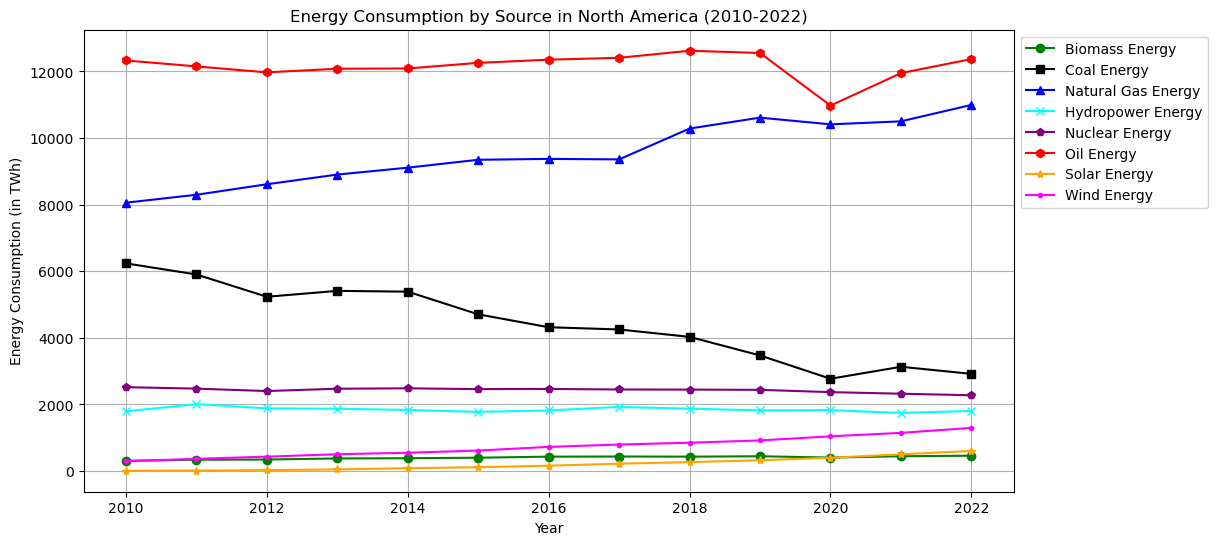

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(df_NA_total['Year'], df_NA_total['Bio Total'], label='Biomass Energy', color='green', marker='o')
plt.plot(df_NA_total['Year'], df_NA_total['Coal Total'], label='Coal Energy', color='black', marker='s')
plt.plot(df_NA_total['Year'], df_NA_total['Gas Total'], label='Natural Gas Energy', color='blue', marker='^')
plt.plot(df_NA_total['Year'], df_NA_total['Hydro Total'], label='Hydropower Energy', color='cyan', marker='x')
plt.plot(df_NA_total['Year'], df_NA_total['Nuclear Total'], label='Nuclear Energy', color='purple', marker='p')
plt.plot(df_NA_total['Year'], df_NA_total['Oil Total'], label='Oil Energy', color='red', marker='h')
plt.plot(df_NA_total['Year'], df_NA_total['Solar Total'], label='Solar Energy', color='orange', marker='*')
plt.plot(df_NA_total['Year'], df_NA_total['Wind Total'], label='Wind Energy', color='magenta', marker='.')


plt.title('Energy Consumption by Source in North America (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [53]:
df_SA_total = df_World[df_World["Continent"]=="South_America"]
df_SA_total.head()

,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
1,2010,South_America,182.997,301.698,1421.987,1677.323,57.884,2645.514,0.019,7.134
7,2011,South_America,172.63,318.551,1463.361,1777.408,58.395,2718.404,0.024,8.592
13,2012,South_America,169.243,336.865,1554.67,1722.636,59.044,2878.061,0.218,16.141
19,2013,South_America,196.325,365.894,1604.157,1643.121,56.639,2996.319,0.646,21.2
25,2014,South_America,215.204,382.929,1654.344,1592.069,54.312,3011.016,1.943,40.068


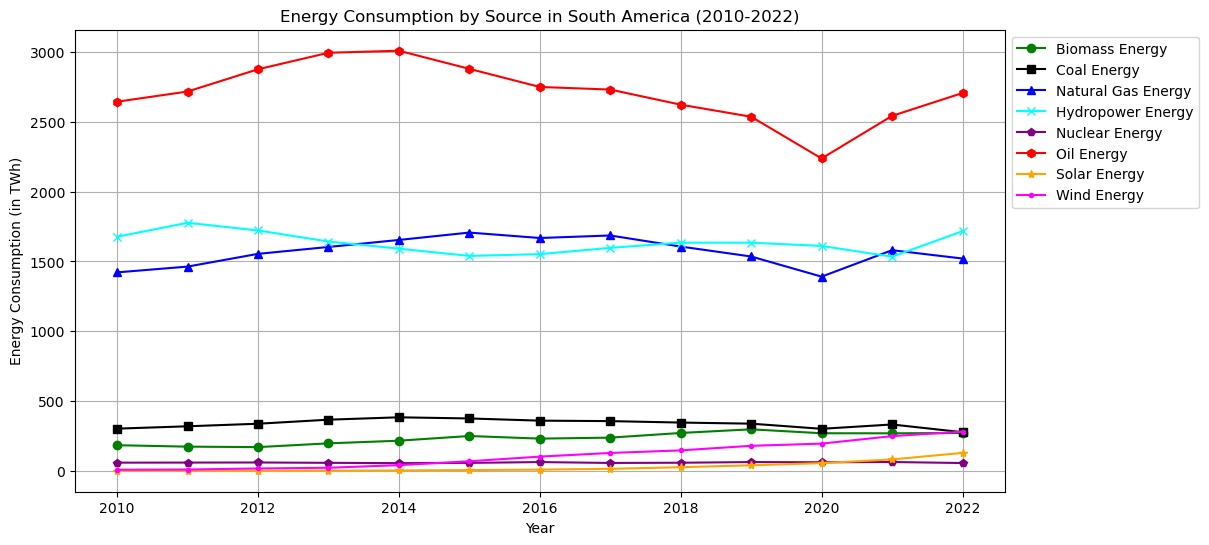

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(df_SA_total['Year'], df_SA_total['Bio Total'], label='Biomass Energy', color='green', marker='o')
plt.plot(df_SA_total['Year'], df_SA_total['Coal Total'], label='Coal Energy', color='black', marker='s')
plt.plot(df_SA_total['Year'], df_SA_total['Gas Total'], label='Natural Gas Energy', color='blue', marker='^')
plt.plot(df_SA_total['Year'], df_SA_total['Hydro Total'], label='Hydropower Energy', color='cyan', marker='x')
plt.plot(df_SA_total['Year'], df_SA_total['Nuclear Total'], label='Nuclear Energy', color='purple', marker='p')
plt.plot(df_SA_total['Year'], df_SA_total['Oil Total'], label='Oil Energy', color='red', marker='h')
plt.plot(df_SA_total['Year'], df_SA_total['Solar Total'], label='Solar Energy', color='orange', marker='*')
plt.plot(df_SA_total['Year'], df_SA_total['Wind Total'], label='Wind Energy', color='magenta', marker='.')


plt.title('Energy Consumption by Source in South America (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [55]:
df_EU_total = df_World[df_World["Continent"]=="Europe"]
df_EU_total.head()

,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
2,2010,Europe,149.66,4102.751,6405.355,1693.881,2748.15,8665.475,65.202,425.814
8,2011,Europe,158.181,4258.486,5959.318,1497.482,2710.501,8429.701,130.084,515.701
14,2012,Europe,171.787,4382.688,5816.63,1639.96,2626.23,8189.796,197.91,589.606
20,2013,Europe,156.822,4235.185,5699.032,1705.586,2579.27,8006.815,235.715,676.183
26,2014,Europe,167.242,3996.392,5151.914,1656.73,2579.997,7866.967,265.855,717.331


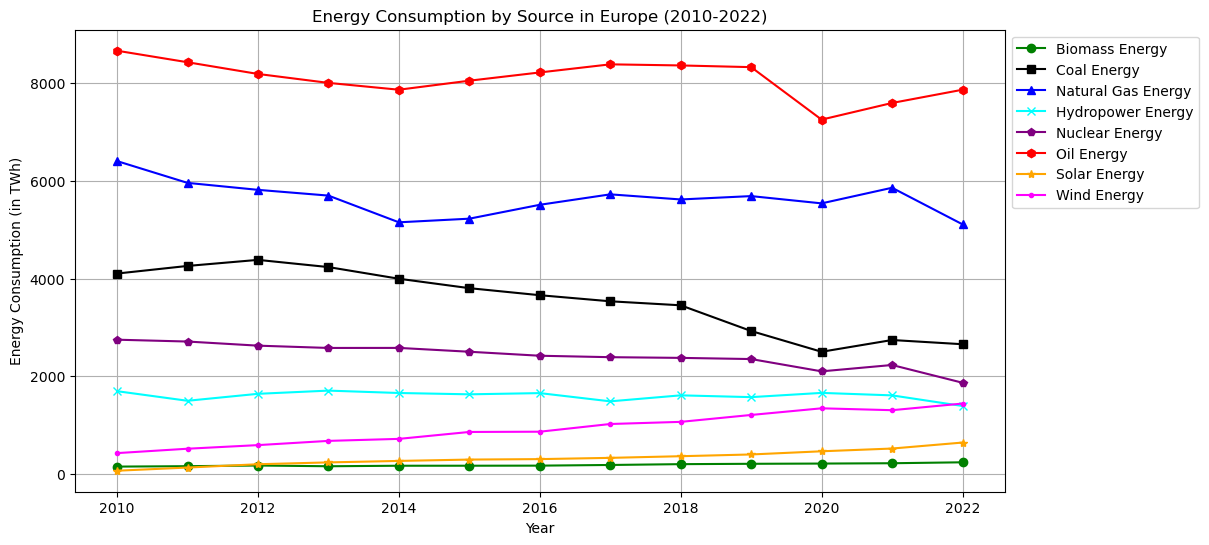

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(df_EU_total['Year'], df_EU_total['Bio Total'], label='Biomass Energy', color='green', marker='o')
plt.plot(df_EU_total['Year'], df_EU_total['Coal Total'], label='Coal Energy', color='black', marker='s')
plt.plot(df_EU_total['Year'], df_EU_total['Gas Total'], label='Natural Gas Energy', color='blue', marker='^')
plt.plot(df_EU_total['Year'], df_EU_total['Hydro Total'], label='Hydropower Energy', color='cyan', marker='x')
plt.plot(df_EU_total['Year'], df_EU_total['Nuclear Total'], label='Nuclear Energy', color='purple', marker='p')
plt.plot(df_EU_total['Year'], df_EU_total['Oil Total'], label='Oil Energy', color='red', marker='h')
plt.plot(df_EU_total['Year'], df_EU_total['Solar Total'], label='Solar Energy', color='orange', marker='*')
plt.plot(df_EU_total['Year'], df_EU_total['Wind Total'], label='Wind Energy', color='magenta', marker='.')


plt.title('Energy Consumption by Source in Europe (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [57]:
df_AF_total = df_World[df_World["Continent"]=="Africa"]
df_AF_total.head()

,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
3,2010,Africa,0.159,1120.952,736.056,49.233,36.028,1042.161,0.172,5.834
9,2011,Africa,0.467,1095.606,797.711,50.862,34.154,1065.074,0.947,6.136
15,2012,Africa,0.555,1070.493,861.177,44.053,34.119,1094.815,1.691,5.761
21,2013,Africa,0.544,1068.839,868.885,46.944,36.891,1115.958,0.809,7.709
27,2014,Africa,0.447,1094.279,877.826,46.631,35.859,1133.49,3.453,10.888


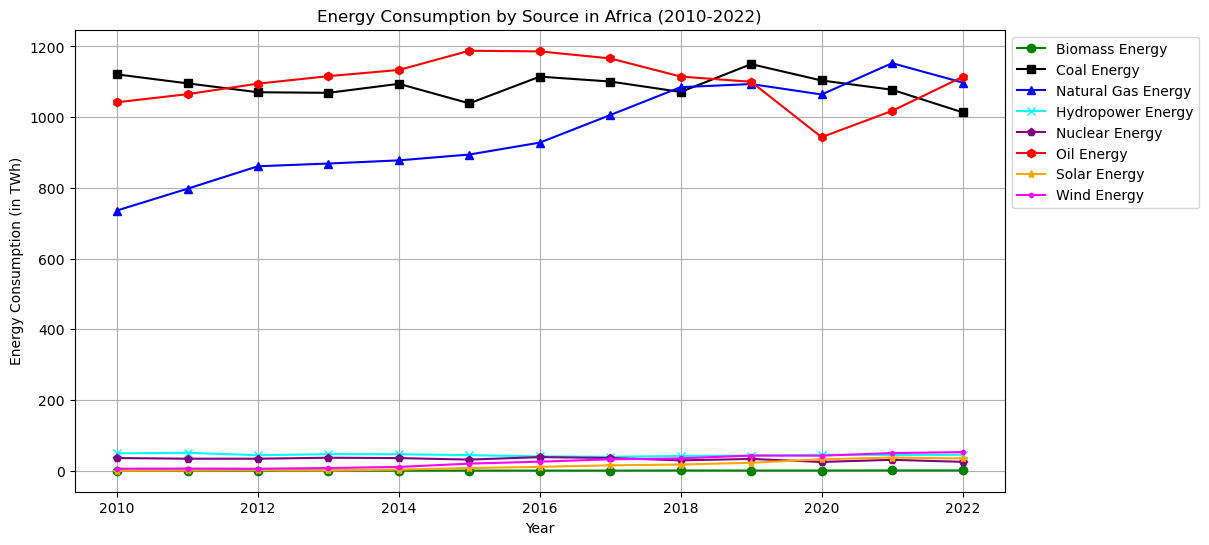

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df_AF_total['Year'], df_AF_total['Bio Total'], label='Biomass Energy', color='green', marker='o')
plt.plot(df_AF_total['Year'], df_AF_total['Coal Total'], label='Coal Energy', color='black', marker='s')
plt.plot(df_AF_total['Year'], df_AF_total['Gas Total'], label='Natural Gas Energy', color='blue', marker='^')
plt.plot(df_AF_total['Year'], df_AF_total['Hydro Total'], label='Hydropower Energy', color='cyan', marker='x')
plt.plot(df_AF_total['Year'], df_AF_total['Nuclear Total'], label='Nuclear Energy', color='purple', marker='p')
plt.plot(df_AF_total['Year'], df_AF_total['Oil Total'], label='Oil Energy', color='red', marker='h')
plt.plot(df_AF_total['Year'], df_AF_total['Solar Total'], label='Solar Energy', color='orange', marker='*')
plt.plot(df_AF_total['Year'], df_AF_total['Wind Total'], label='Wind Energy', color='magenta', marker='.')


plt.title('Energy Consumption by Source in Africa (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [59]:
df_OC_total = df_World[df_World["Continent"]=="Oceania"]
df_OC_total.head()

,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
4,2010,Oceania,2.626,623.466,360.824,106.783,0.0,603.364,2.725,18.38
10,2011,Oceania,3.127,608.332,371.035,123.264,0.0,633.157,5.651,23.143
16,2012,Oceania,3.055,574.74,377.495,109.493,0.0,646.428,6.627,26.882
22,2013,Oceania,2.947,544.12,397.07,114.789,0.0,664.06,10.504,30.745
28,2014,Oceania,3.034,538.398,427.967,105.119,0.0,663.144,13.466,32.477


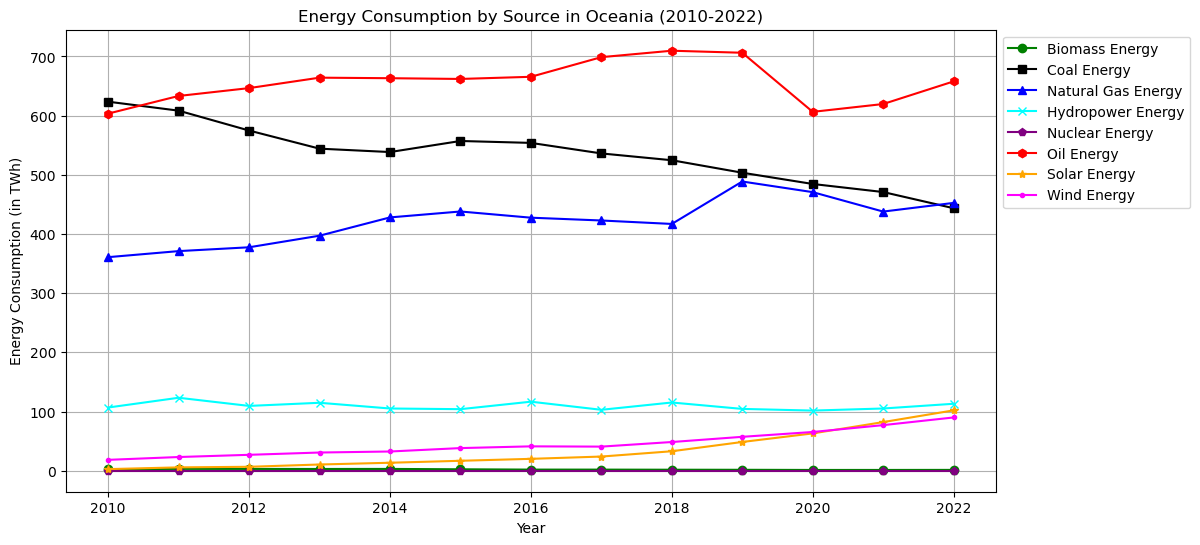

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df_OC_total['Year'], df_OC_total['Bio Total'], label='Biomass Energy', color='green', marker='o')
plt.plot(df_OC_total['Year'], df_OC_total['Coal Total'], label='Coal Energy', color='black', marker='s')
plt.plot(df_OC_total['Year'], df_OC_total['Gas Total'], label='Natural Gas Energy', color='blue', marker='^')
plt.plot(df_OC_total['Year'], df_OC_total['Hydro Total'], label='Hydropower Energy', color='cyan', marker='x')
plt.plot(df_OC_total['Year'], df_OC_total['Nuclear Total'], label='Nuclear Energy', color='purple', marker='p')
plt.plot(df_OC_total['Year'], df_OC_total['Oil Total'], label='Oil Energy', color='red', marker='h')
plt.plot(df_OC_total['Year'], df_OC_total['Solar Total'], label='Solar Energy', color='orange', marker='*')
plt.plot(df_OC_total['Year'], df_OC_total['Wind Total'], label='Wind Energy', color='magenta', marker='.')


plt.title('Energy Consumption by Source in Oceania (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [61]:
df_AS_total = df_World[df_World["Continent"]=="Asia"]
df_AS_total.head()

,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
5,2010,Asia,51.691,29121.577,13907.745,3381.284,2006.525,20269.28,16.15,208.103
11,2011,Asia,57.044,31276.515,14753.358,3364.228,1737.035,20943.311,28.376,290.561
17,2012,Asia,68.093,32001.476,15243.879,3757.483,1373.196,21897.933,42.421,378.779
23,2013,Asia,88.853,32634.493,15511.419,4054.494,1362.208,22275.47,79.305,483.235
29,2014,Asia,102.841,33023.274,15952.462,4433.397,1445.908,22698.758,160.586,548.437


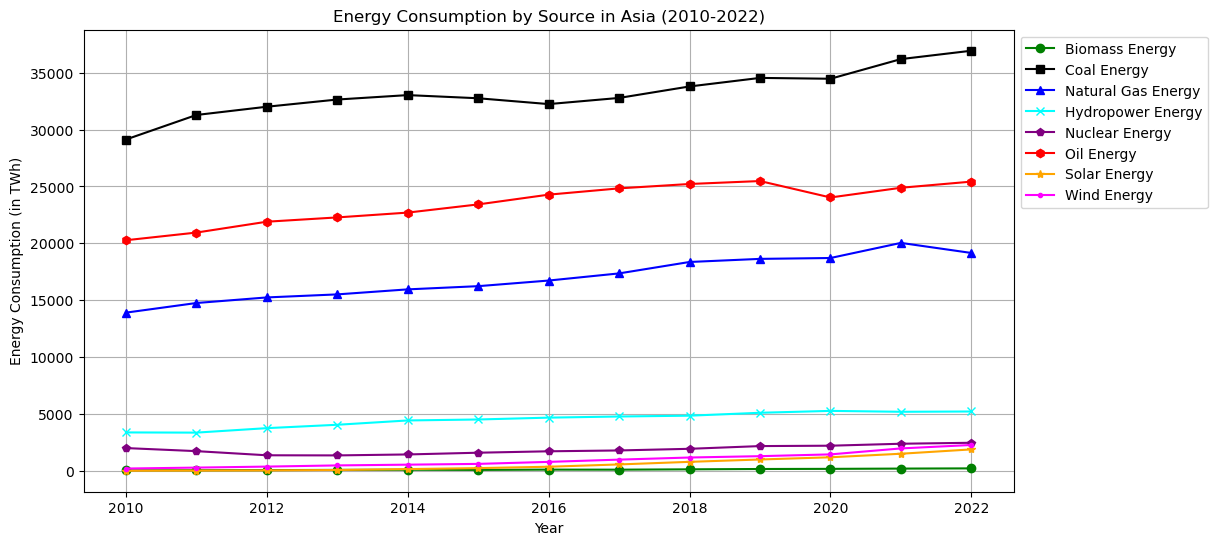

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df_AS_total['Year'], df_AS_total['Bio Total'], label='Biomass Energy', color='green', marker='o')
plt.plot(df_AS_total['Year'], df_AS_total['Coal Total'], label='Coal Energy', color='black', marker='s')
plt.plot(df_AS_total['Year'], df_AS_total['Gas Total'], label='Natural Gas Energy', color='blue', marker='^')
plt.plot(df_AS_total['Year'], df_AS_total['Hydro Total'], label='Hydropower Energy', color='cyan', marker='x')
plt.plot(df_AS_total['Year'], df_AS_total['Nuclear Total'], label='Nuclear Energy', color='purple', marker='p')
plt.plot(df_AS_total['Year'], df_AS_total['Oil Total'], label='Oil Energy', color='red', marker='h')
plt.plot(df_AS_total['Year'], df_AS_total['Solar Total'], label='Solar Energy', color='orange', marker='*')
plt.plot(df_AS_total['Year'], df_AS_total['Wind Total'], label='Wind Energy', color='magenta', marker='.')


plt.title('Energy Consumption by Source in Asia (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (in TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

In [63]:
df_World.head()

,Year,Continent,Bio Total,Coal Total,Gas Total,Hydro Total,Nuclear Total,Oil Total,Solar Total,Wind Total
0,2010,North_America,308.292,6235.646,8058.101,1792.517,2517.871,12329.032,9.158,293.022
1,2010,South_America,182.997,301.698,1421.987,1677.323,57.884,2645.514,0.019,7.134
2,2010,Europe,149.66,4102.751,6405.355,1693.881,2748.15,8665.475,65.202,425.814
3,2010,Africa,0.159,1120.952,736.056,49.233,36.028,1042.161,0.172,5.834
4,2010,Oceania,2.626,623.466,360.824,106.783,0.0,603.364,2.725,18.38


In [64]:
pop_cont_df

,Continent,Population
0,North_America,483509371
1,South_America,395279529
2,Europe,658405304
3,Africa,232367506
4,Oceania,28898420
5,Asia,4294142392


In [65]:
world_per_capita_df = pd.DataFrame(columns=["Continent","Bio Per Capita","Coal Per Capita", "Hydro Per Capita", 
                                            "Nuclear Per Capita","Oil Per Capita","Solar Per Capita", "Wind Per Capita"])
world_per_capita_df

,Continent,Bio Per Capita,Coal Per Capita,Hydro Per Capita,Nuclear Per Capita,Oil Per Capita,Solar Per Capita,Wind Per Capita


In [66]:
i = 0
for a in World:
    
    new_df_name = df_World[df_World["Continent"]== a]
    
    bp = 1000000* new_df_name["Bio Total"].sum() / pop_cont_df["Population"][i]
    cp = 1000000* new_df_name["Coal Total"].sum() / pop_cont_df["Population"][i]
    hp = 1000000* new_df_name["Hydro Total"].sum() / pop_cont_df["Population"][i]
    np = 1000000* new_df_name["Nuclear Total"].sum() / pop_cont_df["Population"][i]
    op = 1000000* new_df_name["Oil Total"].sum() / pop_cont_df["Population"][i]
    sp = 1000000* new_df_name["Solar Total"].sum() / pop_cont_df["Population"][i]
    wp = 1000000* new_df_name["Wind Total"].sum() / pop_cont_df["Population"][i]
    
    world_per_capita_df.loc[i, :] = [a, bp, cp, hp, np, op, sp, wp]
    
    
    i += 1

In [67]:
world_per_capita_df

,Continent,Bio Per Capita,Coal Per Capita,Hydro Per Capita,Nuclear Per Capita,Oil Per Capita,Solar Per Capita,Wind Per Capita
0,North_America,10.764927,119.465037,49.598834,65.29684,327.000647,5.735833,19.714832
1,South_America,7.660273,11.09636,53.723847,1.917433,89.21903,0.901694,3.632318
2,Europe,3.642504,70.244542,31.594732,47.812355,159.82249,6.386015,18.272313
3,Africa,0.034093,60.770485,2.504821,1.840567,61.460164,0.801885,1.455707
4,Oceania,0.97552,240.942273,49.225563,0.0,295.36729,14.825067,20.415511
5,Asia,0.370292,100.532221,13.651758,5.645281,71.17096,1.840018,2.90816


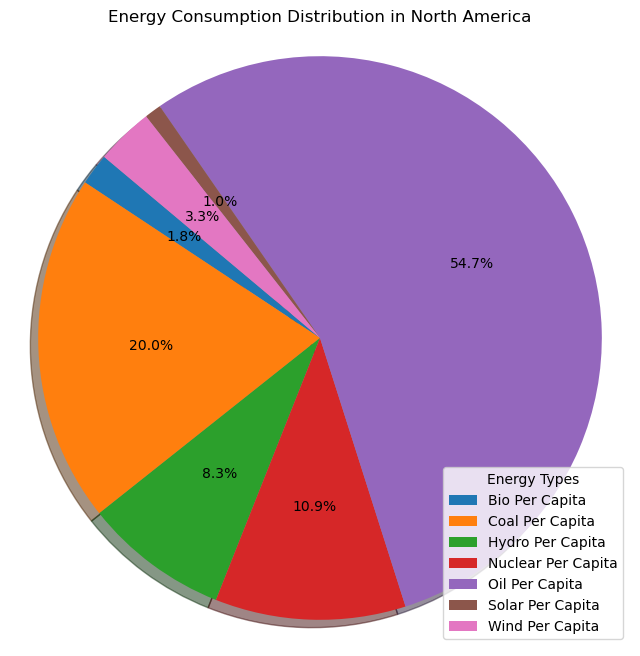

In [68]:
north_america_data = world_per_capita_df[world_per_capita_df['Continent'] == 'North_America'].iloc[0, 1:]

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(north_america_data, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Energy Consumption Distribution in North America')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Create a legend and place it in the bottom corner
plt.legend(wedges, north_america_data.index, title="Energy Types", loc="lower right", bbox_to_anchor=(1, 0))
plt.show()

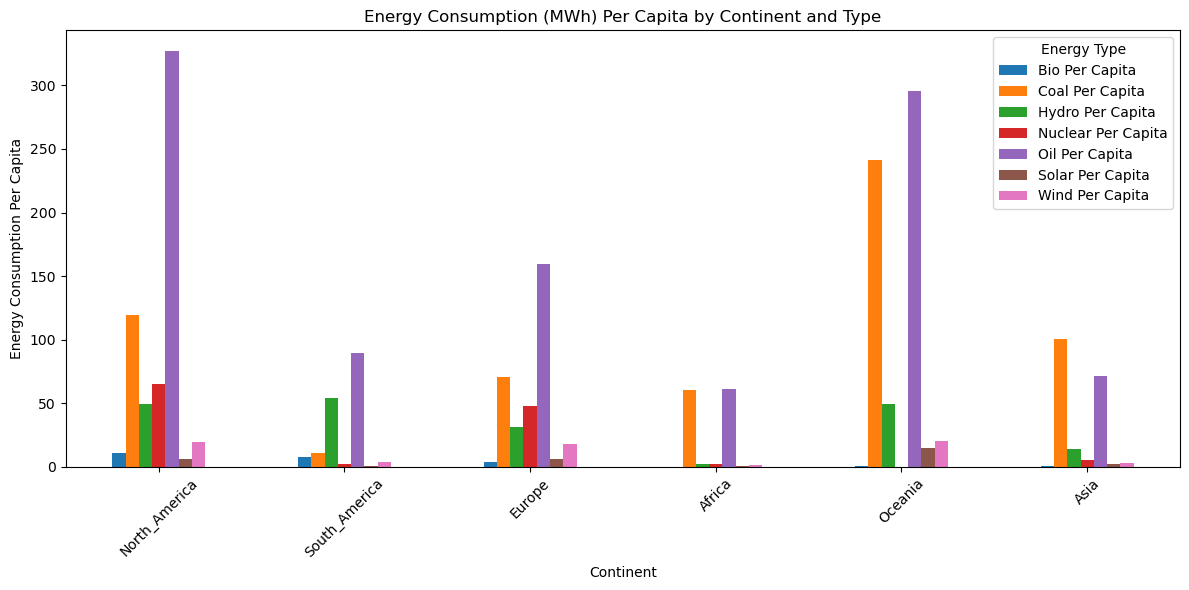

In [69]:
world_per_capita_df.set_index('Continent', inplace=True)

world_per_capita_df.plot(kind='bar', figsize=(12, 6))

plt.title('Energy Consumption (MWh) Per Capita by Continent and Type')
plt.xlabel('Continent')
plt.ylabel('Energy Consumption Per Capita')
plt.xticks(rotation=45)
plt.legend(title='Energy Type')

plt.tight_layout()
plt.show()

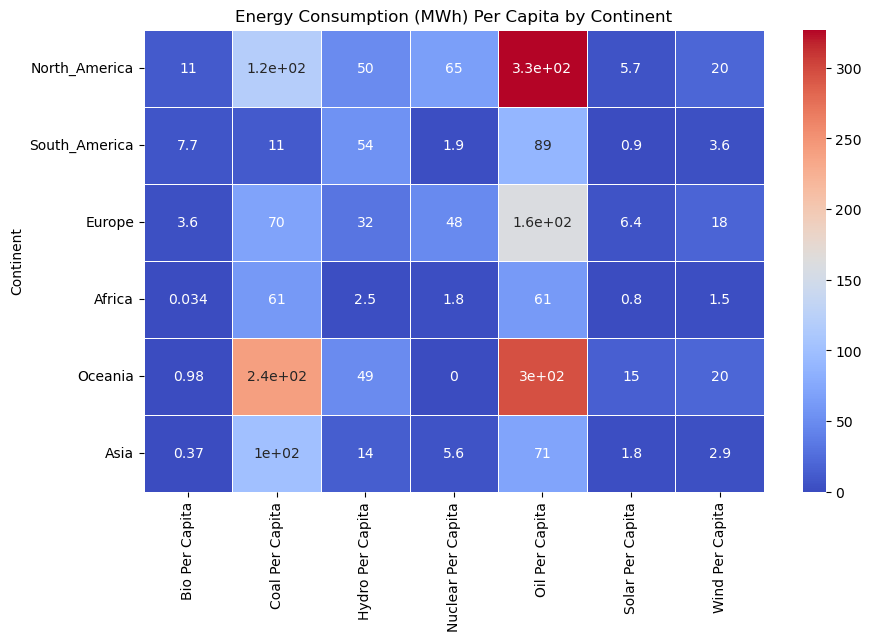

In [70]:
world_per_capita_df = world_per_capita_df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 6))
sns.heatmap(world_per_capita_df, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Energy Consumption (MWh) Per Capita by Continent')
plt.show()

In [71]:
df_world_grandtotal = pd.DataFrame(columns=["Country","Total Energy Consumption Per Capita"])
df_world_grandtotal

,Country,Total Energy Consumption Per Capita


In [72]:
i = 0
for country in countries:
    df_df = df_for_loop[df_for_loop["Country"]== country]
    grand_total_pc = 100000* df_df["Total"].sum() / df_df["Population"].mean()
    
    
    df_world_grandtotal.loc[i, :] = [country,grand_total_pc]
    
    
    i += 1
    

In [73]:
df_world_grandtotal = df_world_grandtotal[df_world_grandtotal != 0].dropna()
df_world_grandtotal.loc[df_world_grandtotal['Country'] == 'United States', 'Country'] = 'United States of America'
df_world_grandtotal.head()

,Country,Total Energy Consumption Per Capita
2,Algeria,19.311103
7,Argentina,28.400858
10,Australia,84.953194
11,Austria,58.579395
12,Azerbaijan,21.917521


In [74]:
import geopandas as gpd
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldmap.head()

C:\Users\husey\AppData\Local\Temp\ipykernel_25780\4047288853.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [75]:
merged_world = worldmap.merge(df_world_grandtotal, left_on='name', right_on='Country', how='inner')
merged_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Total Energy Consumption Per Capita
0,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,140.498065
1,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,102.082838
2,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,53.993974
3,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,22.463233
4,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,9.823099


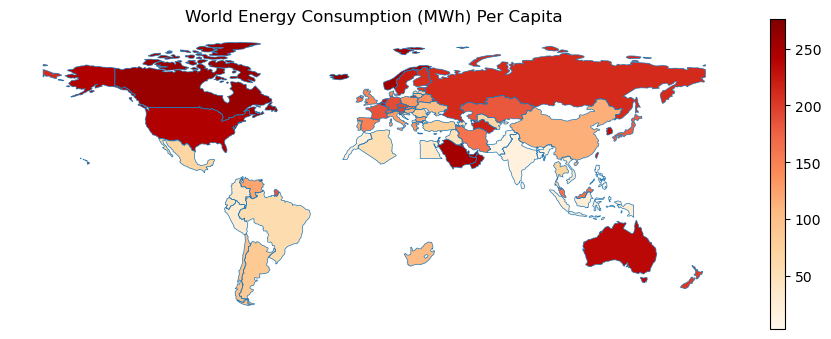

In [76]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_world.boundary.plot(ax=ax, linewidth=0.5)

# Plot the choropleth map based on Total Energy Consumption Per Capita without labels
cmap = mpl.cm.OrRd
merged_world.plot(column='Total Energy Consumption Per Capita', ax=ax, legend=False, cmap=cmap)

# Create a colorbar without a label
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=merged_world['Total Energy Consumption Per Capita'].min(), 
                                                                vmax=merged_world['Total Energy Consumption Per Capita'].max()))
sm.set_array([]) 
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)


plt.title('World Energy Consumption (MWh) Per Capita')
plt.axis('off') 
plt.show()
